In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import requests
from bs4 import BeautifulSoup as bs
from tqdm import tqdm 

from matplotlib import font_manager

font_family = font_manager.FontProperties(fname='C:/Windows/Fonts/malgunsl.ttf').get_name()
plt.rc('font', family=font_family)

In [80]:
def url_create(sDate, eDate ,row=10):
    
    key='5oaL5XF7nxzVRPO3HpIwVCoC4CQBQx9tcB5WqEJnT%2FFA9KUyD7HAktzqQFC6xRqGSstXpp%2BSNVA6MjfX6%2BJlEQ%3D%3D'
    url='http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19GenAgeCaseInfJson?serviceKey='+key
    url=url+'&pageNo=1&numOfRows='+str(row)
    url=url+'&startCreateDt='+sDate
    url=url+'&endCreateDt='+eDate
    
    covid_html=requests.get(url)
    
    if covid_html.status_code!=200:
        print('조회할수 없습니다.')
        exit()
    soup=bs(covid_html.content, 'html.parser')
   
    covid_soup=soup.find_all('item')
    cov_Lst=[]
    
    for i in covid_soup:
        Dte=i.find('createdt').text
        gubun=i.find('gubun').text
        conF=i.find('confcase').text
        Death=i.find('death').text

        cov_Lst.append({"등록일":Dte,"구분":gubun,"누적확진자":conF,"사망자":Death})
        
    df=cov_Lst
    
    return df  


sDt = input('시작일 입력(예: 20210101): ')
eDt = input('종료일 입력(예: 20210101): ')

df1 = url_create(sDt,eDt)
df2=pd.DataFrame(df1)



시작일 입력(예: 20210101): 20210507
종료일 입력(예: 20210101): 20210705


In [81]:
Day=[]

for i in df2['등록일']:
    a=i[:10]
    Day.append(a)
    
df2['등록일']=Day
df2=df2.astype({'누적확진자':'int64', '사망자':'int64'})
df2

df3=df2[df2['구분'].str.contains("여성|남성")].groupby(df2['등록일']).sum()
#df3  #당일 전체 누적 확진자. 사망자 데이터

Tday=[]
b=0
for a in range(len(df3['누적확진자'])):
    if len(Tday)==0:
        Tday.append(df3['누적확진자'][a])
    try:
        b=0
        b=a+1
        Tday.append(df3['누적확진자'][b]-df3['누적확진자'][a])
    except:
        break
        
        
df3['당일확진자']=Tday



  

In [82]:
df4=df2.set_index('등록일')
df4=df4.sort_index()

<AxesSubplot:title={'center':'80 이상'}, xlabel='등록일'>

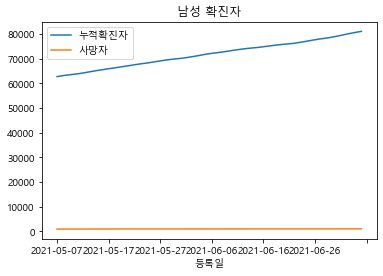

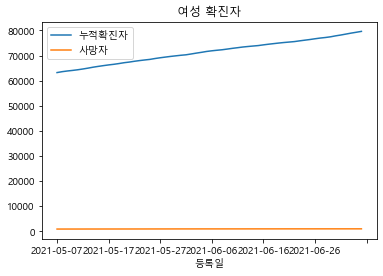

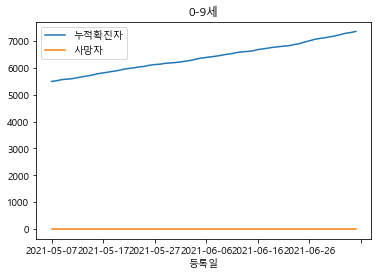

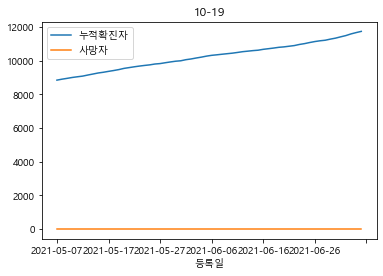

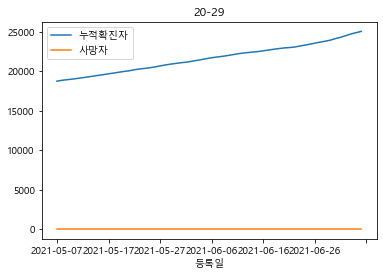

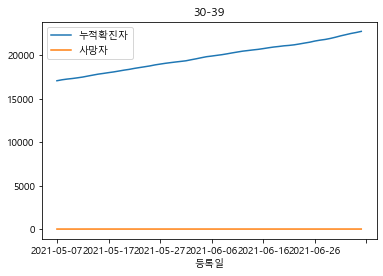

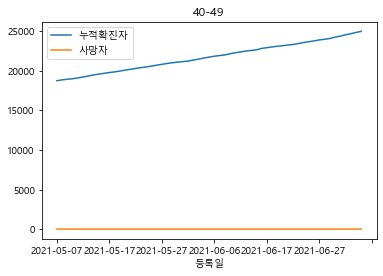

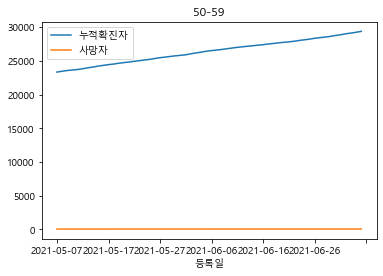

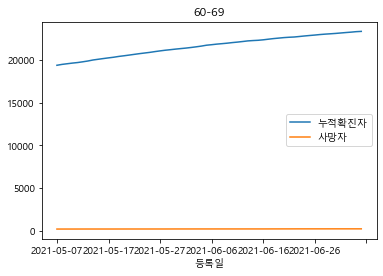

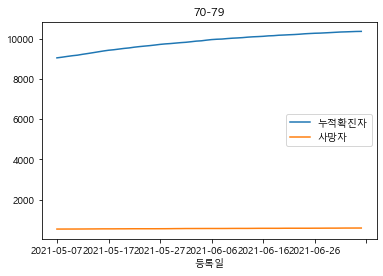

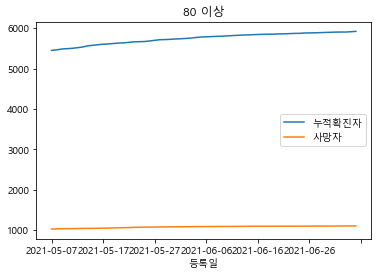

In [85]:
df4[df4['구분']=='남성'].plot(title='남성 확진자')
df4[df4['구분']=='여성'].plot(title='여성 확진자')
df4[df4['구분']=='0-9'].plot(title='0-9세')
df4[df4['구분']=='10-19'].plot(title='10-19')
df4[df4['구분']=='20-29'].plot(title='20-29')
df4[df4['구분']=='30-39'].plot(title='30-39')
df4[df4['구분']=='40-49'].plot(title='40-49')
df4[df4['구분']=='50-59'].plot(title='50-59')
df4[df4['구분']=='60-69'].plot(title='60-69')
df4[df4['구분']=='70-79'].plot(title='70-79')
df4[df4['구분']=='80 이상'].plot(title='80 이상')